In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import linear_model

import statsmodels.api as sm

In [4]:
df = pd.read_csv("monikafellmer20210624115942.csv")
df

,stat_date,city_id,daily_orders,gmv,realpay_price,b_burn,r_burn,gp,cm,c_eng_burn,...,r_burn_rate,r_b_burn_rate,gm_value_rate,cm_gmv_rate,c_eng_burn_rate,c_adq_burn_rate,d_aqcuistion_burn,acquisition_burn,d_cost,cm_value
0,2021-01-01,52010100,1385,295735.07,271469.19,0.00,10428.88,11666.19,8715.89,10886.70,...,0.035264,NaN,0.039448,0.029472,0.036812,0.009976,0.0,0.0,9011.020000,0.069250
1,2021-01-02,52010100,1652,321311.76,268325.84,114.45,13741.24,11508.24,-10033.56,17702.88,...,0.042766,120.063259,0.035816,-0.031227,0.055096,0.067043,0.0,0.0,6299.900016,0.008802
2,2021-01-03,52010100,1867,381729.49,318381.26,136.02,15039.49,18751.67,-6289.43,23267.64,...,0.039398,110.568225,0.049123,-0.016476,0.060953,0.065599,0.0,0.0,-1334.000000,0.026518
3,2021-01-04,52010100,1230,216110.73,182173.69,93.24,9530.14,12471.81,338.61,12273.70,...,0.044098,102.210854,0.057710,0.001567,0.056794,0.056143,0.0,0.0,-2188.999999,0.043915
4,2021-01-05,52010100,1468,292796.89,214644.15,36.27,37526.57,4363.20,-8156.90,28106.07,...,0.128166,1034.644886,0.014902,-0.027859,0.095992,0.042760,0.0,0.0,-430.000006,0.008139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6664,2021-06-16,52320100,704,136662.72,109188.60,117.50,10177.63,10763.49,1824.72,8357.72,...,0.074473,86.618128,0.078760,0.013352,0.061156,0.065408,0.0,0.0,0.000000,0.032163
6665,2021-06-17,52320100,737,146667.46,117414.11,82.50,9809.78,13760.35,3390.01,9073.23,...,0.066885,118.906424,0.093820,0.023114,0.061863,0.070706,0.0,0.0,-130.000000,0.026372
6666,2021-06-18,52320100,833,169067.09,131525.82,226.00,13574.99,15535.19,2152.44,10583.53,...,0.080294,60.066327,0.091888,0.012731,0.062600,0.079156,0.0,0.0,-44.000001,0.020872
6667,2021-06-19,52320100,960,214236.80,168843.70,130.00,9945.84,17480.33,-4686.85,13280.08,...,0.046425,76.506462,0.081593,-0.021877,0.061988,0.103470,0.0,0.0,-1268.000000,-0.007409


<AxesSubplot:title={'center':'Heatmap between variables'}>

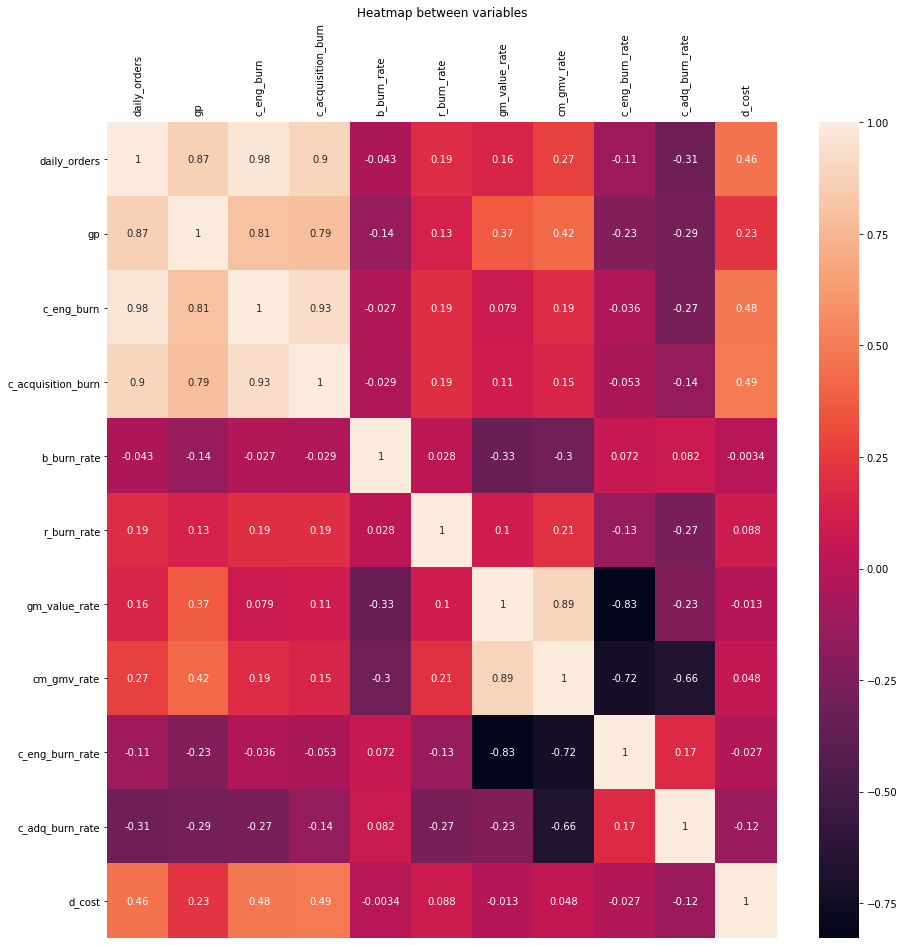

In [51]:
drop = ['d_aqcuistion_burn','acquisition_burn','stat_date','city_id', 'gmv','realpay_price','r_b_burn_rate','b_burn','r_burn','cm','cm_value','gmv_order','paid_asp_gmv' ]
df2 = df.drop(drop, axis=1)

#plt.show()
plt.figure(figsize = (15, 15))
plt.title('Heatmap between variables')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.xticks(rotation=25)
sns.heatmap(df2.corr(), annot = True, cbar = True)

# Correlaciones por ciudades

<AxesSubplot:title={'center':'MTY Heatmap between variables'}>

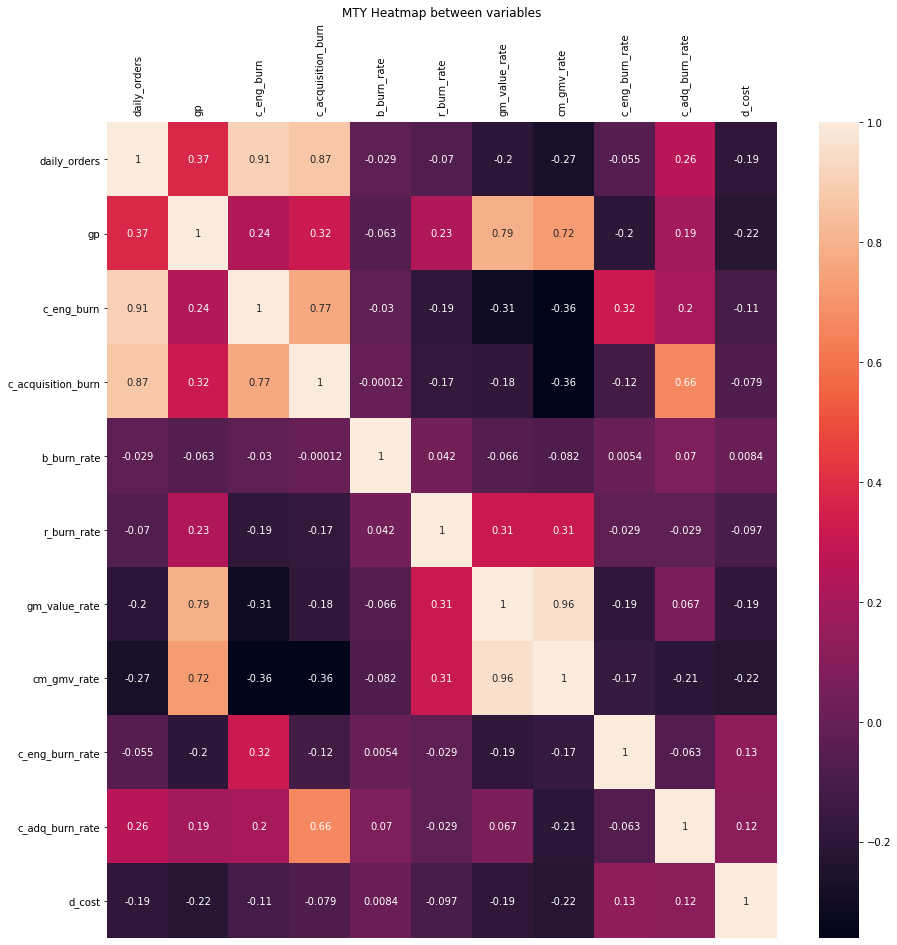

In [56]:
dfMty = df[df['city_id']==52190500]
dropMty = ['d_aqcuistion_burn','acquisition_burn','stat_date','city_id', 'gmv','realpay_price','r_b_burn_rate','b_burn','r_burn','cm','cm_value','gmv_order','paid_asp_gmv' ]
dfMty2 = dfMty.drop(dropMty, axis=1)
#plt.show()
plt.figure(figsize = (15, 15))
plt.title('MTY Heatmap between variables')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.xticks(rotation=25)
sns.heatmap(dfMty2.corr(), annot = True, cbar = True)


<AxesSubplot:title={'center':'CDMX Heatmap between variables'}>

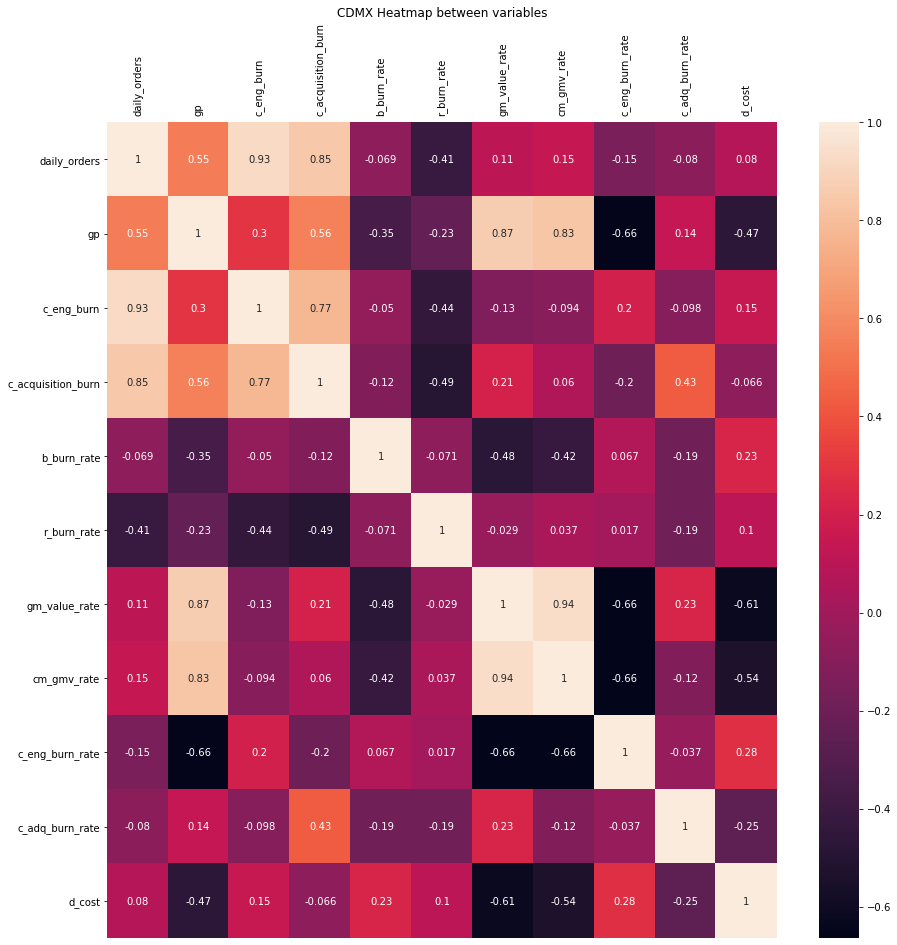

In [55]:
dfMty = df[df['city_id']==52090100]
dropMty = ['d_aqcuistion_burn','acquisition_burn','stat_date','city_id', 'gmv','realpay_price','r_b_burn_rate','b_burn','r_burn','cm','cm_value','gmv_order','paid_asp_gmv' ]
dfMty2 = dfMty.drop(dropMty, axis=1)
#plt.show()
plt.figure(figsize = (15, 15))
plt.title('CDMX Heatmap between variables')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.xticks(rotation=25)
sns.heatmap(dfMty2.corr(), annot = True, cbar = True)

<AxesSubplot:title={'center':'GDL Heatmap between variables'}>

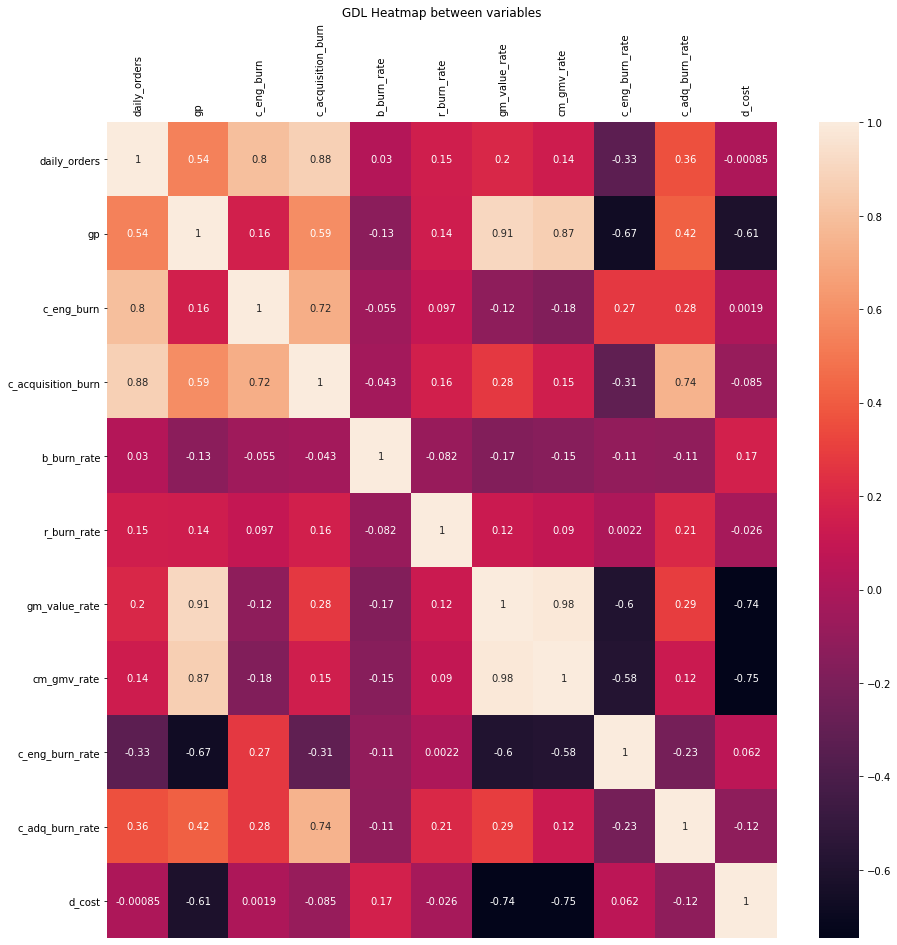

In [57]:
dfMty = df[df['city_id']==52140500]
dropMty = ['d_aqcuistion_burn','acquisition_burn','stat_date','city_id', 'gmv','realpay_price','r_b_burn_rate','b_burn','r_burn','cm','cm_value','gmv_order','paid_asp_gmv' ]
dfMty2 = dfMty.drop(dropMty, axis=1)
#plt.show()
plt.figure(figsize = (15, 15))
plt.title('GDL Heatmap between variables')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.xticks(rotation=25)
sns.heatmap(dfMty2.corr(), annot = True, cbar = True)

<AxesSubplot:title={'center':'Puebla Heatmap between variables'}>

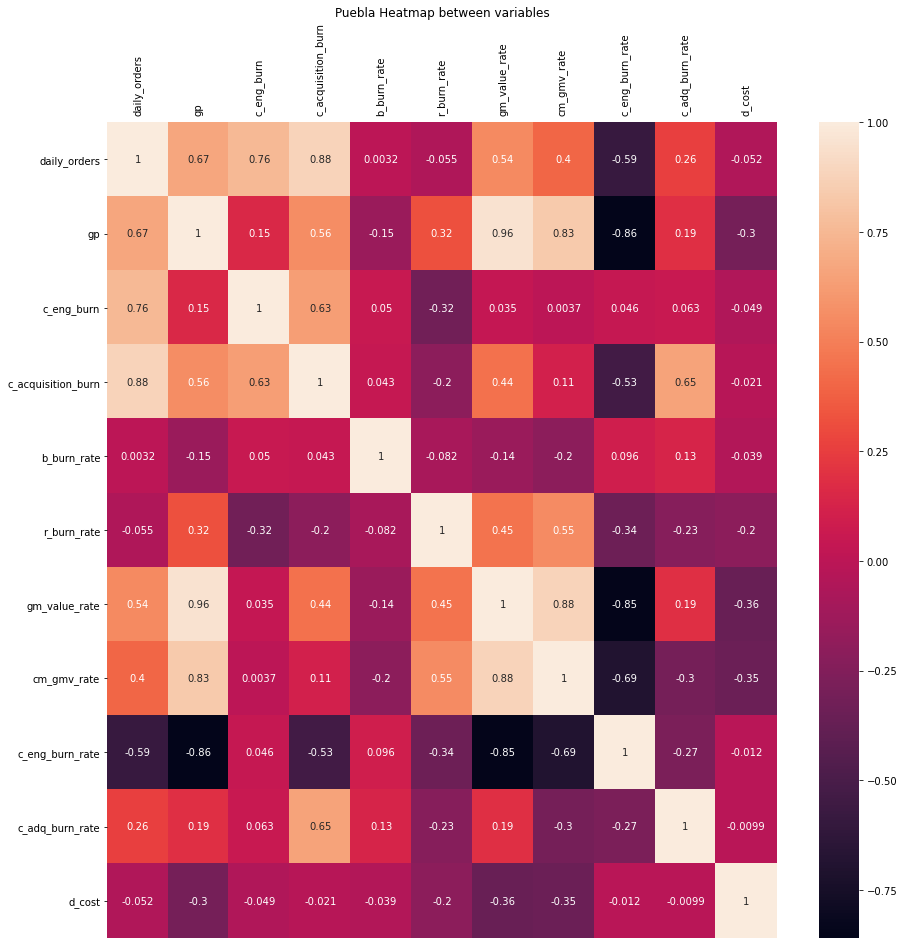

In [58]:
dfMty = df[df['city_id']==52210400]
dropMty = ['d_aqcuistion_burn','acquisition_burn','stat_date','city_id', 'gmv','realpay_price','r_b_burn_rate','b_burn','r_burn','cm','cm_value','gmv_order','paid_asp_gmv' ]
dfMty2 = dfMty.drop(dropMty, axis=1)
#plt.show()
plt.figure(figsize = (15, 15))
plt.title('Puebla Heatmap between variables')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.xticks(rotation=25)
sns.heatmap(dfMty2.corr(), annot = True, cbar = True)

In [38]:
df2 = df2.reset_index()

In [40]:
#multiple linear regression
feature_names = df2.drop(columns = ['gm_value_rate']).columns

#X = df.drop(columns = ['d_aqcuistion_burn'	,'acquisition_burn','stat_date','city_id', 'gmv','realpay_price','b_burn','r_burn','gp','cm','gmv_order','paid_asp_gmv' ]).values
X = df2.values
y = df2['gm_value_rate'].values
#X = X.dropna()
#y = y.dropna()
#X = X.reshape(X.size,1)
#X = X.astype(np.float64, copy=False)

#y = y.reshape(y.size,1)
#y = y.astype(np.float64, copy=False)

np.any(np.isnan(X))



True

In [42]:
np.any(np.isnan(X))

X =np.any(np.isnan(X))
y = np.any(np.isnan(y))

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
#lm.score(X,y)
#coef = lm.coef_.ravel()
coef = np.absolute(lm.coef_.ravel())
print('R2: ', lm.score(X,y))
coefficients = pd.DataFrame({'coefficient':coef, 
                            'feature':feature_names}).sort_values('coefficient', ascending = False).reset_index(drop = True)
display(coefficients.head())

fix, ax = plt.subplots(figsize = [10, 5])
_ = plt.bar(range(len(feature_names)), coef)
_ = plt.xticks(range(len(feature_names)), feature_names, rotation = 90)
_ = plt.ylabel('Coefficients')
_ = plt.title('Coefficients(Larger bar means more important feature)')

plt.show()

ValueError: Expected 2D array, got scalar array instead:
array=False.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
from sklearn.model_selection import train_test_split

X = df2['c_eng_burn_rate'].values
y = df2['gm_value_rate'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 42)

X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.summary()

MissingDataError: exog contains inf or nans

In [59]:
df

,stat_date,city_id,daily_orders,gmv,realpay_price,b_burn,r_burn,gp,cm,c_eng_burn,...,r_burn_rate,r_b_burn_rate,gm_value_rate,cm_gmv_rate,c_eng_burn_rate,c_adq_burn_rate,d_aqcuistion_burn,acquisition_burn,d_cost,cm_value
0,2021-01-01,52010100,1385,295735.07,271469.19,0.00,10428.88,11666.19,8715.89,10886.70,...,0.035264,NaN,0.039448,0.029472,0.036812,0.009976,0.0,0.0,9011.020000,0.069250
1,2021-01-02,52010100,1652,321311.76,268325.84,114.45,13741.24,11508.24,-10033.56,17702.88,...,0.042766,120.063259,0.035816,-0.031227,0.055096,0.067043,0.0,0.0,6299.900016,0.008802
2,2021-01-03,52010100,1867,381729.49,318381.26,136.02,15039.49,18751.67,-6289.43,23267.64,...,0.039398,110.568225,0.049123,-0.016476,0.060953,0.065599,0.0,0.0,-1334.000000,0.026518
3,2021-01-04,52010100,1230,216110.73,182173.69,93.24,9530.14,12471.81,338.61,12273.70,...,0.044098,102.210854,0.057710,0.001567,0.056794,0.056143,0.0,0.0,-2188.999999,0.043915
4,2021-01-05,52010100,1468,292796.89,214644.15,36.27,37526.57,4363.20,-8156.90,28106.07,...,0.128166,1034.644886,0.014902,-0.027859,0.095992,0.042760,0.0,0.0,-430.000006,0.008139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6664,2021-06-16,52320100,704,136662.72,109188.60,117.50,10177.63,10763.49,1824.72,8357.72,...,0.074473,86.618128,0.078760,0.013352,0.061156,0.065408,0.0,0.0,0.000000,0.032163
6665,2021-06-17,52320100,737,146667.46,117414.11,82.50,9809.78,13760.35,3390.01,9073.23,...,0.066885,118.906424,0.093820,0.023114,0.061863,0.070706,0.0,0.0,-130.000000,0.026372
6666,2021-06-18,52320100,833,169067.09,131525.82,226.00,13574.99,15535.19,2152.44,10583.53,...,0.080294,60.066327,0.091888,0.012731,0.062600,0.079156,0.0,0.0,-44.000001,0.020872
6667,2021-06-19,52320100,960,214236.80,168843.70,130.00,9945.84,17480.33,-4686.85,13280.08,...,0.046425,76.506462,0.081593,-0.021877,0.061988,0.103470,0.0,0.0,-1268.000000,-0.007409


In [82]:
nan_value = float("NaN")
dfc = df.replace("", nan_value, inplace=True)
dfc = dfc.dropna(subset = ["r_b_burn_rate"], inplace=True)
dfc

AttributeError: 'NoneType' object has no attribute 'dropna'

In [128]:
#dfc = df['r_b_burn_rate'].dropna()
#df0 = df[df['city_id']==52310300]
X = df['c_eng_burn'].values
y = df['cm_gmv_rate'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     148.5
Date:                Fri, 25 Jun 2021   Prob (F-statistic):           2.09e-33
Time:                        10:25:17   Log-Likelihood:                 3775.9
No. Observations:                3130   AIC:                            -7548.
Df Residuals:                    3128   BIC:                            -7536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0503      0.002    -32.742      0.000      -0.053      -0.047
x1          1.022e-07   8.39e-09     12.186      0.000    8.58e-08    1.19e-07
==============================================================================
Omnibus:                     1565.232   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13048.745
Skew:                          -2.220   Prob(JB):                         0.00
Kurtosis:                      11.964   Cond. No.                     2.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

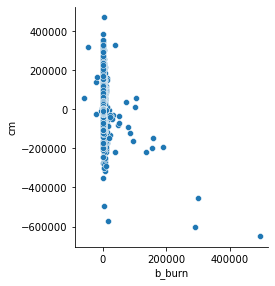

In [123]:
sns.pairplot(df, x_vars=['b_burn'], 
             y_vars='cm', size=4, aspect=1, kind='scatter', diag_kind=None)
plt.show(sns)

In [126]:
X = df[['c_eng_burn','r_b_burn_rate', 'd_cost', 'c_adq_burn_rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['gm_value_rate']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn -----para predecir Y con estos inputs ---
#New_Interest_Rate = 2.75
#New_Unemployment_Rate = 5.3
#print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.05731156590884216
Coefficients: 
 [ 1.72294854e-08  9.23300174e-08 -1.54977421e-07 -4.54365650e-01]
                            OLS Regression Results                            
Dep. Variable:          gm_value_rate   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     149.3
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          5.37e-120
Time:                        10:18:32   Log-Likelihood:                 7166.1
No. Observations:                4472   AIC:                        -1.432e+04
Df Residuals:                    4467   BIC:                        -1.429e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------